In [1]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../..')

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import adjusted_rand_score

In [3]:
from pygraphs.measure import *
from pygraphs.cluster import KKMeans, KKMeansVanilla, KKMeansSklearn, KKMeansKernlab, SpectralClustering
from pygraphs.graphs import StochasticBlockModel
from pygraphs.scenario import ParallelByGraphs
from pygraphs.measure import logComm_K

In [4]:
graphs, info = StochasticBlockModel(100, 2, p_in=0.3, p_out=0.2).generate_graphs(100)

In [5]:
exp = ParallelByGraphs(adjusted_rand_score, np.linspace(0, 1, 31), progressbar=True, verbose=False)
results = {}
for alg in [SpectralClustering, KKMeans, KKMeansSklearn, KKMeansVanilla, KKMeansKernlab]:
    print(alg.name)
    results[alg.name] = exp.perform(alg, logComm_K, graphs, 2, n_jobs=2)
    with open(alg.name + '.pkl', 'wb') as f:
        pickle.dump(results[alg.name], f)

SpectralClustering



Kernel KMeans



KernelKMeansSklearn



VanillaKernelKMeans


/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class KKMeansVanilla is deprecated
  warnings.warn(msg, category=DeprecationWarning)



KernelKMeansKernlab


In [6]:
results.keys()

dict_keys(['SpectralClustering', 'Kernel KMeans', 'KernelKMeansSklearn', 'VanillaKernelKMeans', 'KernelKMeansKernlab'])

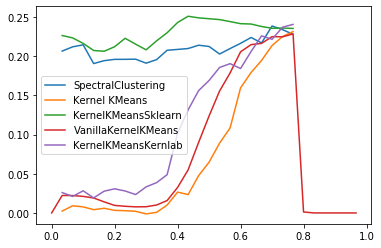

In [7]:
plt.plot(results['SpectralClustering'][0], results['SpectralClustering'][1], label='SpectralClustering')
plt.plot(results['Kernel KMeans'][0], results['Kernel KMeans'][1], label='Kernel KMeans')
plt.plot(results['KernelKMeansSklearn'][0], results['KernelKMeansSklearn'][1], label='KernelKMeansSklearn')
plt.plot(results['VanillaKernelKMeans'][0], results['VanillaKernelKMeans'][1], label='VanillaKernelKMeans')
plt.plot(results['KernelKMeansKernlab'][0], results['KernelKMeansKernlab'][1], label='KernelKMeansKernlab')
plt.legend()